<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/K_means_%26_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**

K-means & Hierarchical Clustering Ce cas nécessite de développer une segmentation de la clientèle pour définir la stratégie marketing. L'échantillon de données résume le comportement d'utilisation d'environ 9000 titulaires de cartes de crédit actives au cours des 6 derniers mois. Le fichier est au niveau du client avec 18 variables comportementales.

credit card dataset :

**CUST_ID**: Identification du titulaire de la carte de crédit (Categorical)

**BALANCE**: le montant du solde restant sur leur compte pour effectuer des achats 

**BALANCE_FREQUENCY** : La fréquence de mise à jour de la balance, score compris entre 0 et 1 (1 = frequently updated, 0 = not frequently updated) 

**PURCHASES**:Montant des achats effectués à partir du compte

**ONEOFF_PURCHASES**: Montant maximal des achats effectués en une seule fois

**INSTALLMENTS_PURCHASES**: Montant de l'achat effectué en plusieurs fois

**CASH_ADVANCE**:Avance de fonds versée par l'utilisateur

**PURCHASES_FREQUENCY**: la fréquence des achats, score compris entre 0 et 1 (1 = frequently purchased, 0 = not frequently purchased)

 **ONEOFFPURCHASESFREQUENCY**: La fréquence des achats simultanés (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY**: La fréquence des achats en plusieurs fois (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY**: La fréquence de paiement de l'avance de trésorerie

**CASHADVANCETRX**: Nombre de transactions effectuées avec "Cash in Advance".

**PURCHASES_TRX**: Nombre de transactions d'achat effectuées

**CREDIT_LIMIT**: Limite de la carte de crédit pour l'utilisateur 

**PAYMENTS**: Montant du paiement effectué par l'utilisateur

**MINIMUM_PAYMENTS**: Montant minimum des paiements effectués par l'utilisateur

**PRCFULLPAYMENT**: Pourcentage du paiement intégral payé par utilisateur

**TENURE**: Durée du service de la carte de crédit pour l'utilisateur

1. Load your dataset. 

2. Use hierarchical clustering to identify the inherent groupings within your data.

3. Plot the clusters. 

4. Plot the dendrogram. Use K-means clustering. 

5. Try different K values and select the best one. 

6. Plot the clusters. 

7. Compare the two results. 

Bonus: Search for another validation metric

In [6]:
from google.colab import drive
drive.mount('/gdrive') 

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# Load your dataset.

In [7]:
import pandas as pd

credit_card_dataset = pd.read_csv("/gdrive/MyDrive/Gomycode /Introduction a IA /unsupervised learning /#1- Unsupervised Clustering/checkpoint/CC GENERAL.csv")
credit_card_dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


L'échantillon de données présente **18** **variables** comportementales d'utilisation de **8950** **titulaires** de cartes de crédit actives 

In [8]:
credit_card_dataset.shape

(8950, 18)

## data cleaning 

Voyons voir les ccaractéristiques retenu par le service marketing pour étudier la clientèle

In [9]:
credit_card_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Le titulaire de la carte de crédit est identifé de manière unique. 

In [10]:
credit_card_dataset.CUST_ID.is_unique

True

Ce qui équivaut à dire que les **8950 clients** sont enregistré qu'une seule fois dans la base de données du système

In [11]:
credit_card_dataset.CUST_ID.value_counts().sum()

8950

Ce qui repésente statistiquement parlant 100% du domaine d'étude. 

In [12]:
credit_card_dataset.CUST_ID.value_counts().sum()/credit_card_dataset.shape[0]*100

100.0

### Interpretation
Le caratère unique de la variable **CUST_ID** ne nous est pas d'une grande aide pour notre étude, ceci implique que l'on doit éliminer cette colone de notre dataset. 

In [13]:
data = credit_card_dataset.drop(columns='CUST_ID')
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

❌ Où se trouvent les valeurs manquantes ?

In [14]:
data.columns[data.isnull().any()]

Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')

Valeurs manquantes se trouvent dans les variables suivantes : 

* **CREDIT_LIMIT** : Limite de la carte de crédit pour l'utilisateur
* **MINIMUM_PAYMENTS** :  Montant minimum des paiements effectués par l'utilisateur

Combien a-ton de valeurs nulls dans chacunes de ses colones ?

In [15]:
data.isnull().sum()[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

on peut obsever les enrégistrements de valeurs NULLS 

 * la valeur manques au niveau de la Limite de la carte de crédit pour l'utilisateur

In [16]:
data[data.CREDIT_LIMIT.isnull()==True]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


On peut remplacer cette valeur manquante par une valeur aléatoir avec la methode fillna(method = 'ffill', inplace=True) dans **CREDIT_LIMIT**  

In [17]:
data.CREDIT_LIMIT.fillna(method = 'ffill', inplace=True)
data[data.CREDIT_LIMIT.isnull()==True]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


* la valeur manques au niveau du Montant minimum des paiements effectués par l'utilisateur

In [18]:
data[data.MINIMUM_PAYMENTS.isnull()==True]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


**MINIMUM_PAYMENTS** contient 313 valeurs NAN soit 3,5% des données du dataset on peut simplement le **remplacer** par la **moyenne** des Montant minimum des paiements effectués par l'utilisateur enregistée qui est d'environ **864.21**

In [19]:
round(data.MINIMUM_PAYMENTS.describe().get('mean'),2)

864.21

In [20]:
data.MINIMUM_PAYMENTS.fillna(data.MINIMUM_PAYMENTS.mean(), inplace=True)
data[data.MINIMUM_PAYMENTS.isnull()==True]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Notre dataset est enfin prêt pour notre model.

Explorons un peu les données de façon global :

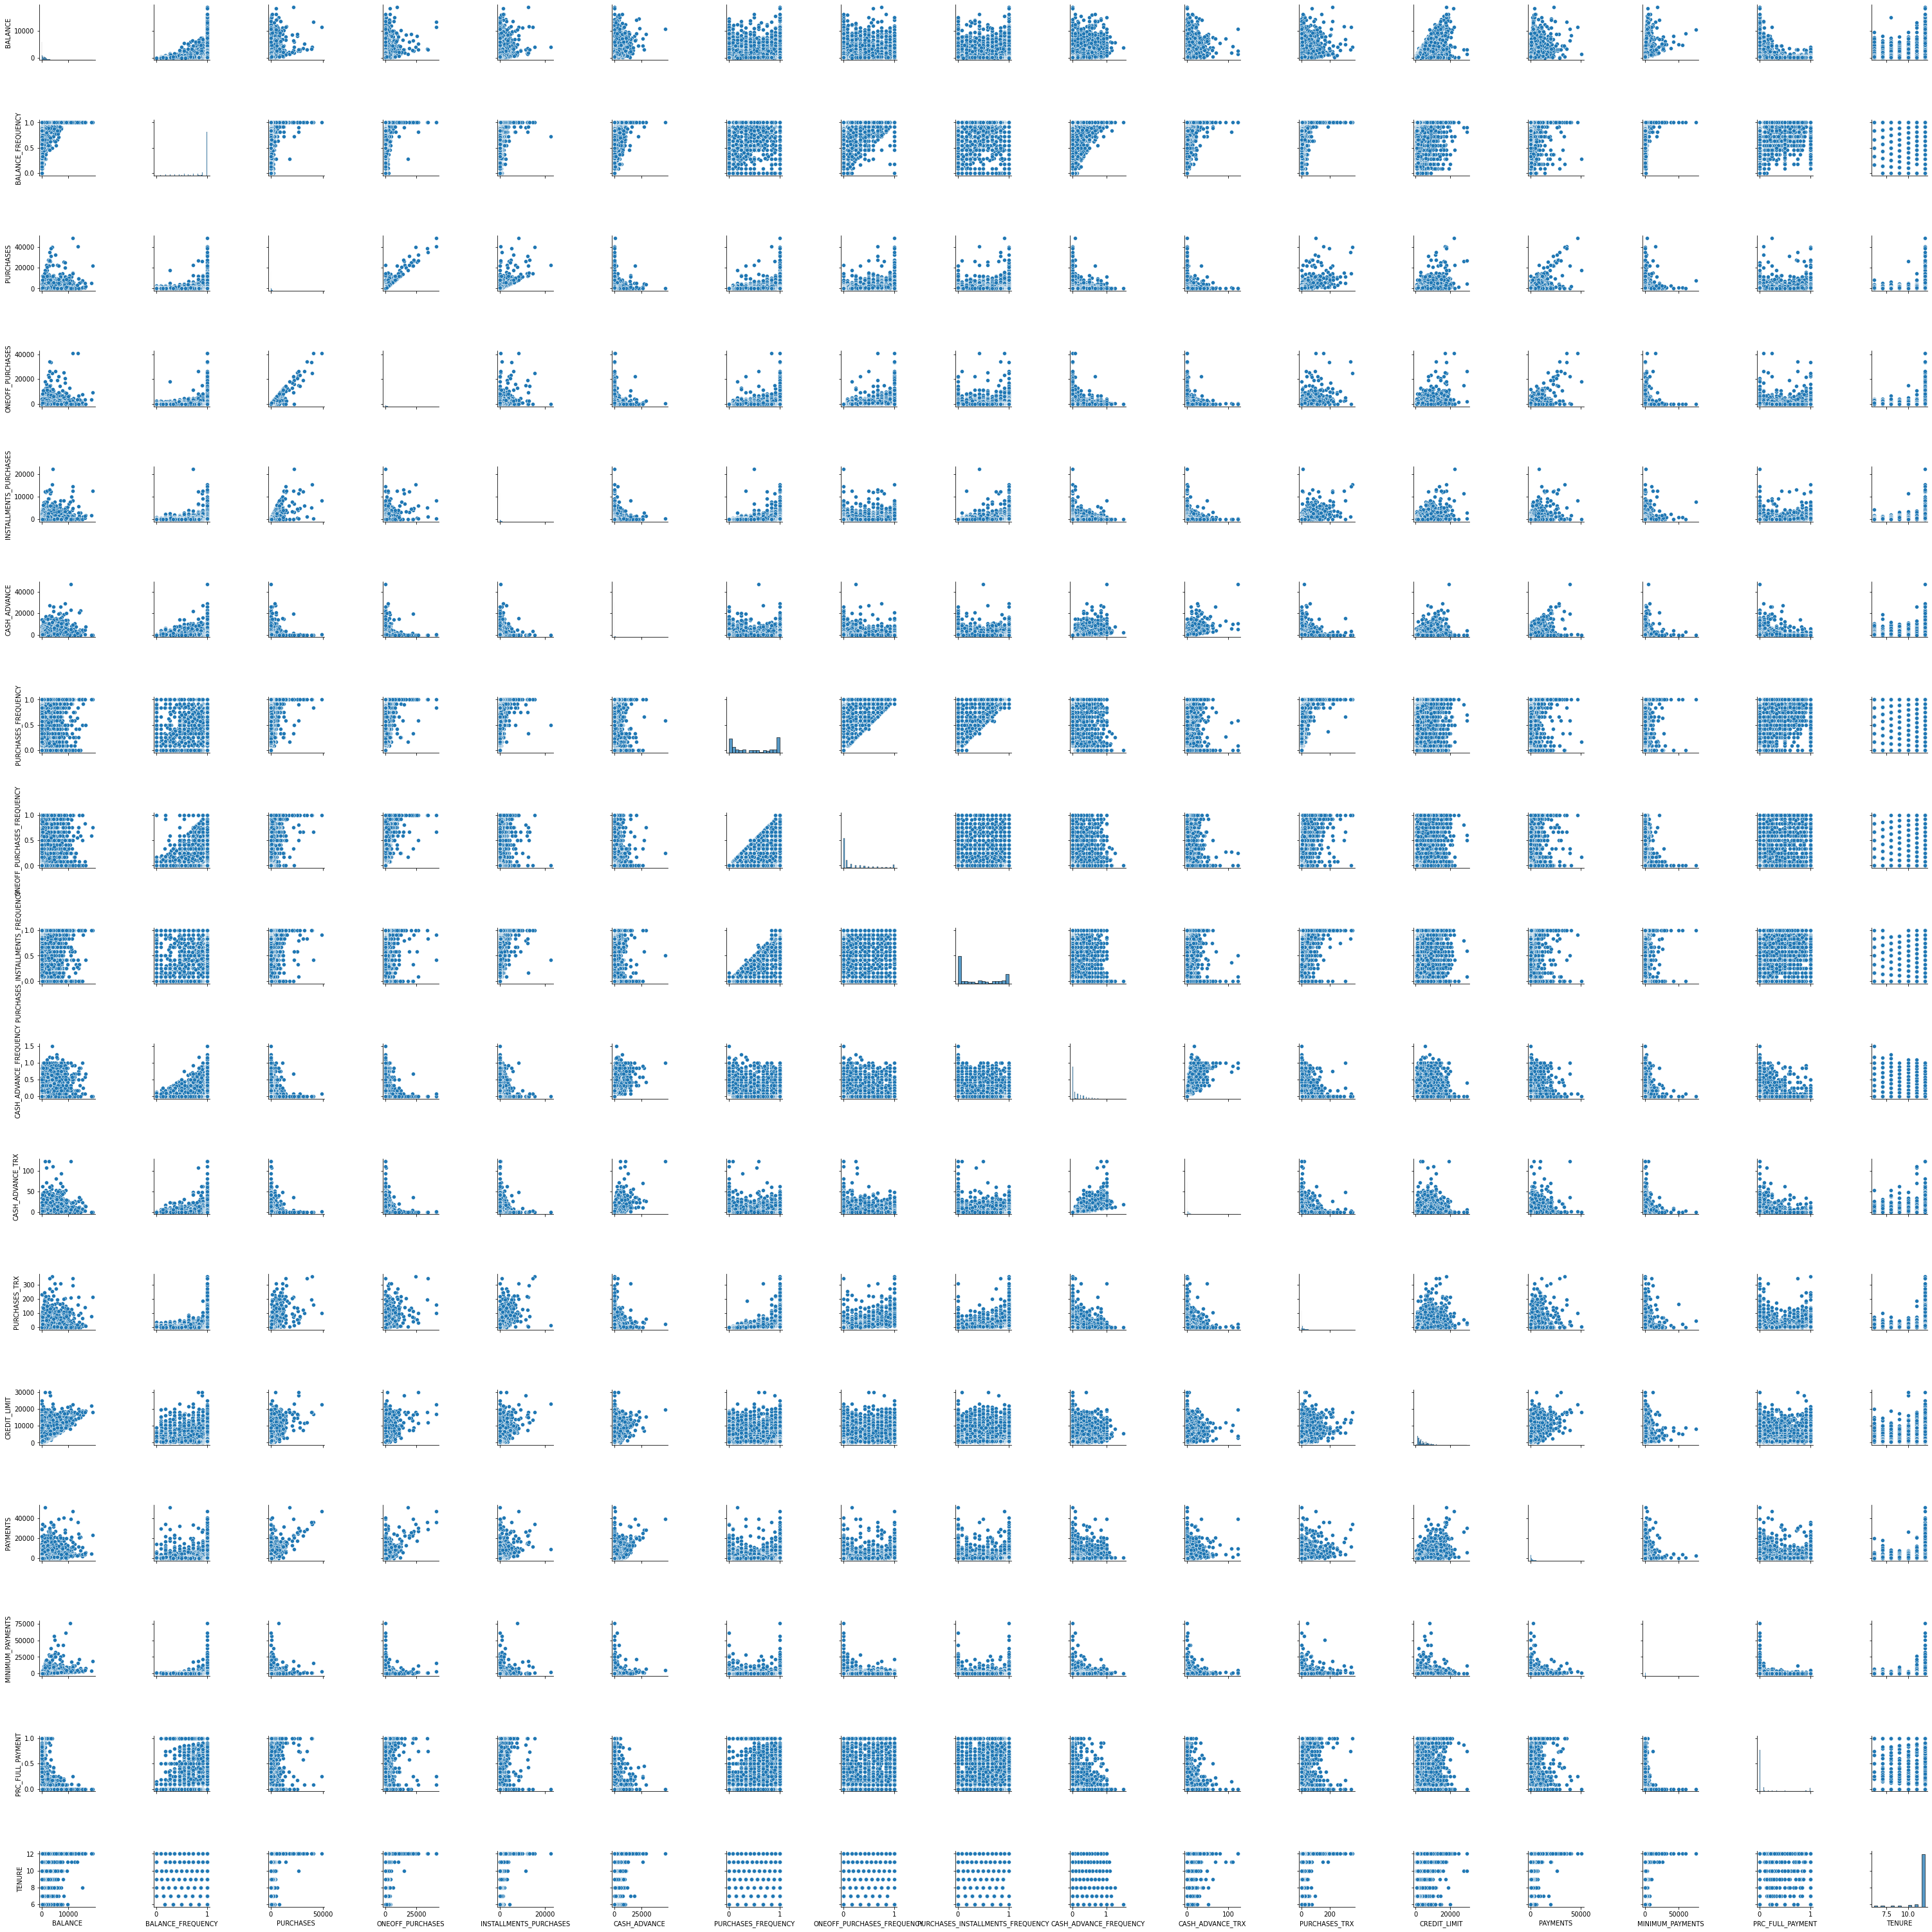

In [21]:
import seaborn as sns 

sns.pairplot(data)

### Interpretation
on observe des nuages de points qui couvrent l'ensemble de plan à 2 dimmension sur certains  plot, des distributions linéaires pour d'autres et des distributions non continu sur des graph présentant les relations avec des variables catégorielles. 



Visualisons la correlation entre les variables :

In [22]:
matrice_corelation = data.corr()
matrice_corelation

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531278,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095840,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356966,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319726,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256503,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303988,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119797,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295040,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060766,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132613,0.183192,0.097898,-0.249773,-0.133372


**ONEOFF_PURCHASES** et **PURCHASES**  on une forte corrélation (**0.916845**) et le graph 
permet de voir regression linéaire entre ces deux variables.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


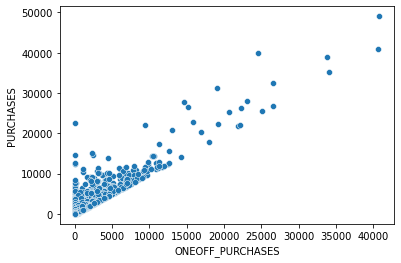

In [23]:
sns.scatterplot(data ['ONEOFF_PURCHASES'] , data ["PURCHASES"])

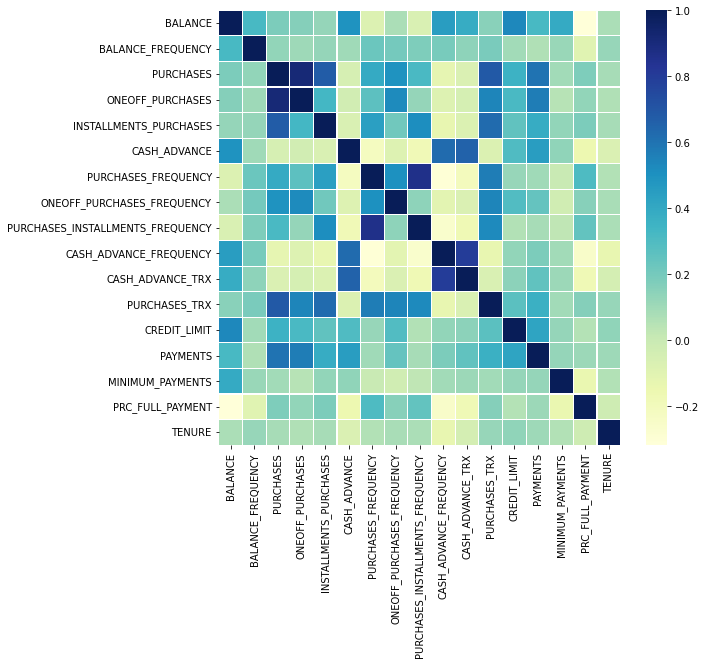

In [24]:
from seaborn.widgets import plt
f, ax = plt.subplots(figsize =(9, 8))
sns.heatmap(matrice_corelation, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

les variables ayant une forte correlation sont :

**PURCHASES** :  Montant des achats effectués à partir du compte

**ONEOFF_PURCHASES** : Montant maximal des achats effectués en une seule fois

**PURCHASES_TRX** : Nombre de transactions d'achat effectuées

**PURCHASES_INSTALLMENTS_FREQUENCY** : Montant de l'achat effectué en plusieurs fois

**PURCHASES_FREQUENCY** : la fréquence des achats, score compris entre 0 et 1 (1 = frequently purchased, 0 = not frequently purchased)

### Interpretation 

Pour le reste de notre études nous alons illustré nos étude comportementale des clients à à travers la relations entre le Montant des achats effectués à partir du compte et le Montant maximal des achats effectués en une seule prise de chaque client 

# Feature Selection

Nous retons que quelques variables que l'on a jugé pertientes pour notre étude 

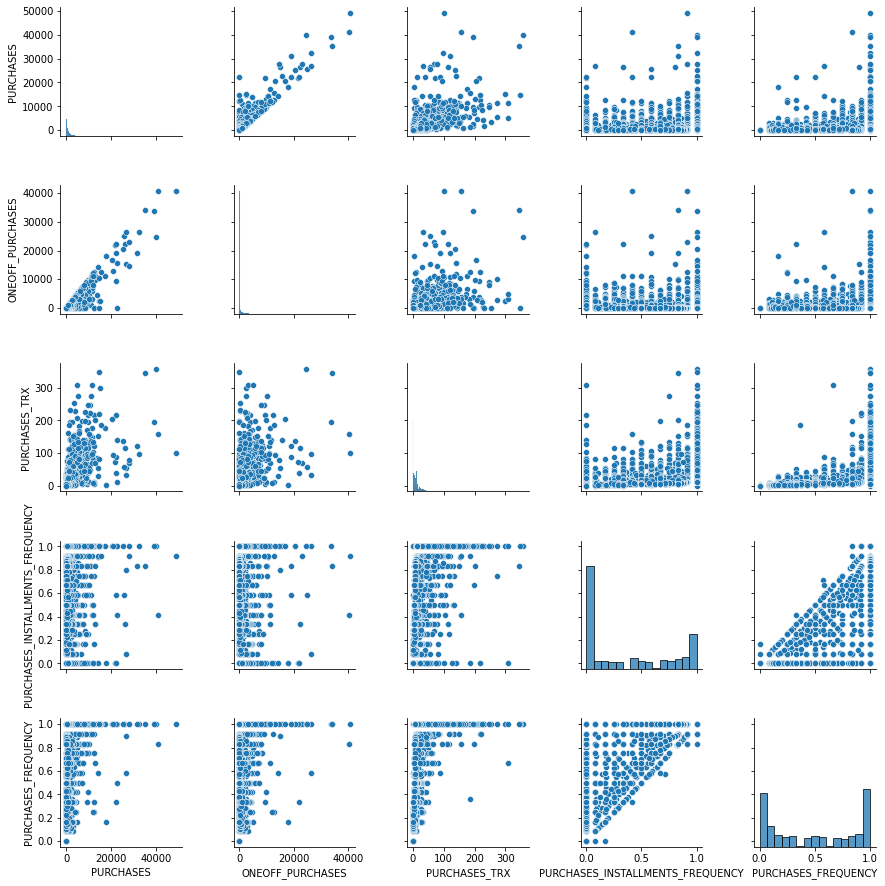

In [25]:
data_engeering = data[['PURCHASES', 'ONEOFF_PURCHASES', 'PURCHASES_TRX','PURCHASES_INSTALLMENTS_FREQUENCY', "PURCHASES_FREQUENCY"]]
sns.pairplot(data_engeering)

# Use hierarchical clustering to identify the inherent groupings within your data.

In [26]:
data = data_engeering.copy()

## Regroupements inhérents
Utilisons la méthode une méthode **Agglomerative clustering** 
avec pour distance métric, la distance **euclidienne**  pour regrouper nos variables.

In [27]:
from sklearn.cluster import AgglomerativeClustering 

Comment déterminer le nombre de clusters  ? 
   
 ✅  Nous ne connaissons pas le ***nombre de clusters à trouver*** ce pendant on va tenter déterminer ce nombre de k groupes ou clusters idéal avec une approche ascendante pour **K compris entre 1 et racine carée du nombres de clients étudiers divisé par deux**

In [28]:
from pandas.io.formats.format import math

In [29]:
Seuil_Nombre_Clusters =  15
Seuil_Nombre_Clusters

15

Exécution de l'approche ascendante : algorithme de **Agglomerative clustering** 

In [30]:
def approche_ascendante(data,k_cluster_to_evaluate):
  ''' Retourn le modèle hierarchical clustering : Agglomerative clustering et un dataframe d'agglomerative contenant des cluster labels pour chaque nombre de groupes k: 1 à seuil '''
  agglomerative=pd.DataFrame()
  for k in range(1,k_cluster_to_evaluate):
    hierarchical_clustering=AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    cluster_labels=hierarchical_clustering.fit_predict(data)
    agglomerative[k]=cluster_labels
  return hierarchical_clustering, agglomerative

In [31]:
hierarchical_clustering, agglomerative = approche_ascendante(data,Seuil_Nombre_Clusters)

 # Plot the clusters

Visualisons les clusteurs labels pour le 67 k-clusters evalués 

In [32]:
agglomerative

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,3,3,1,0,7,7,7,7,7,7,7
1,0,0,0,3,3,1,0,7,7,7,7,7,7,7
2,0,0,0,3,3,1,0,7,7,7,7,7,7,7
3,0,0,0,3,3,1,0,7,7,7,7,7,7,7
4,0,0,0,3,3,1,0,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0,0,0,3,3,1,0,7,7,7,7,7,7,7
8946,0,0,0,3,3,1,0,7,7,7,7,7,7,7
8947,0,0,0,3,3,1,0,7,7,7,7,7,7,7
8948,0,0,0,3,3,1,0,7,7,7,7,7,7,7


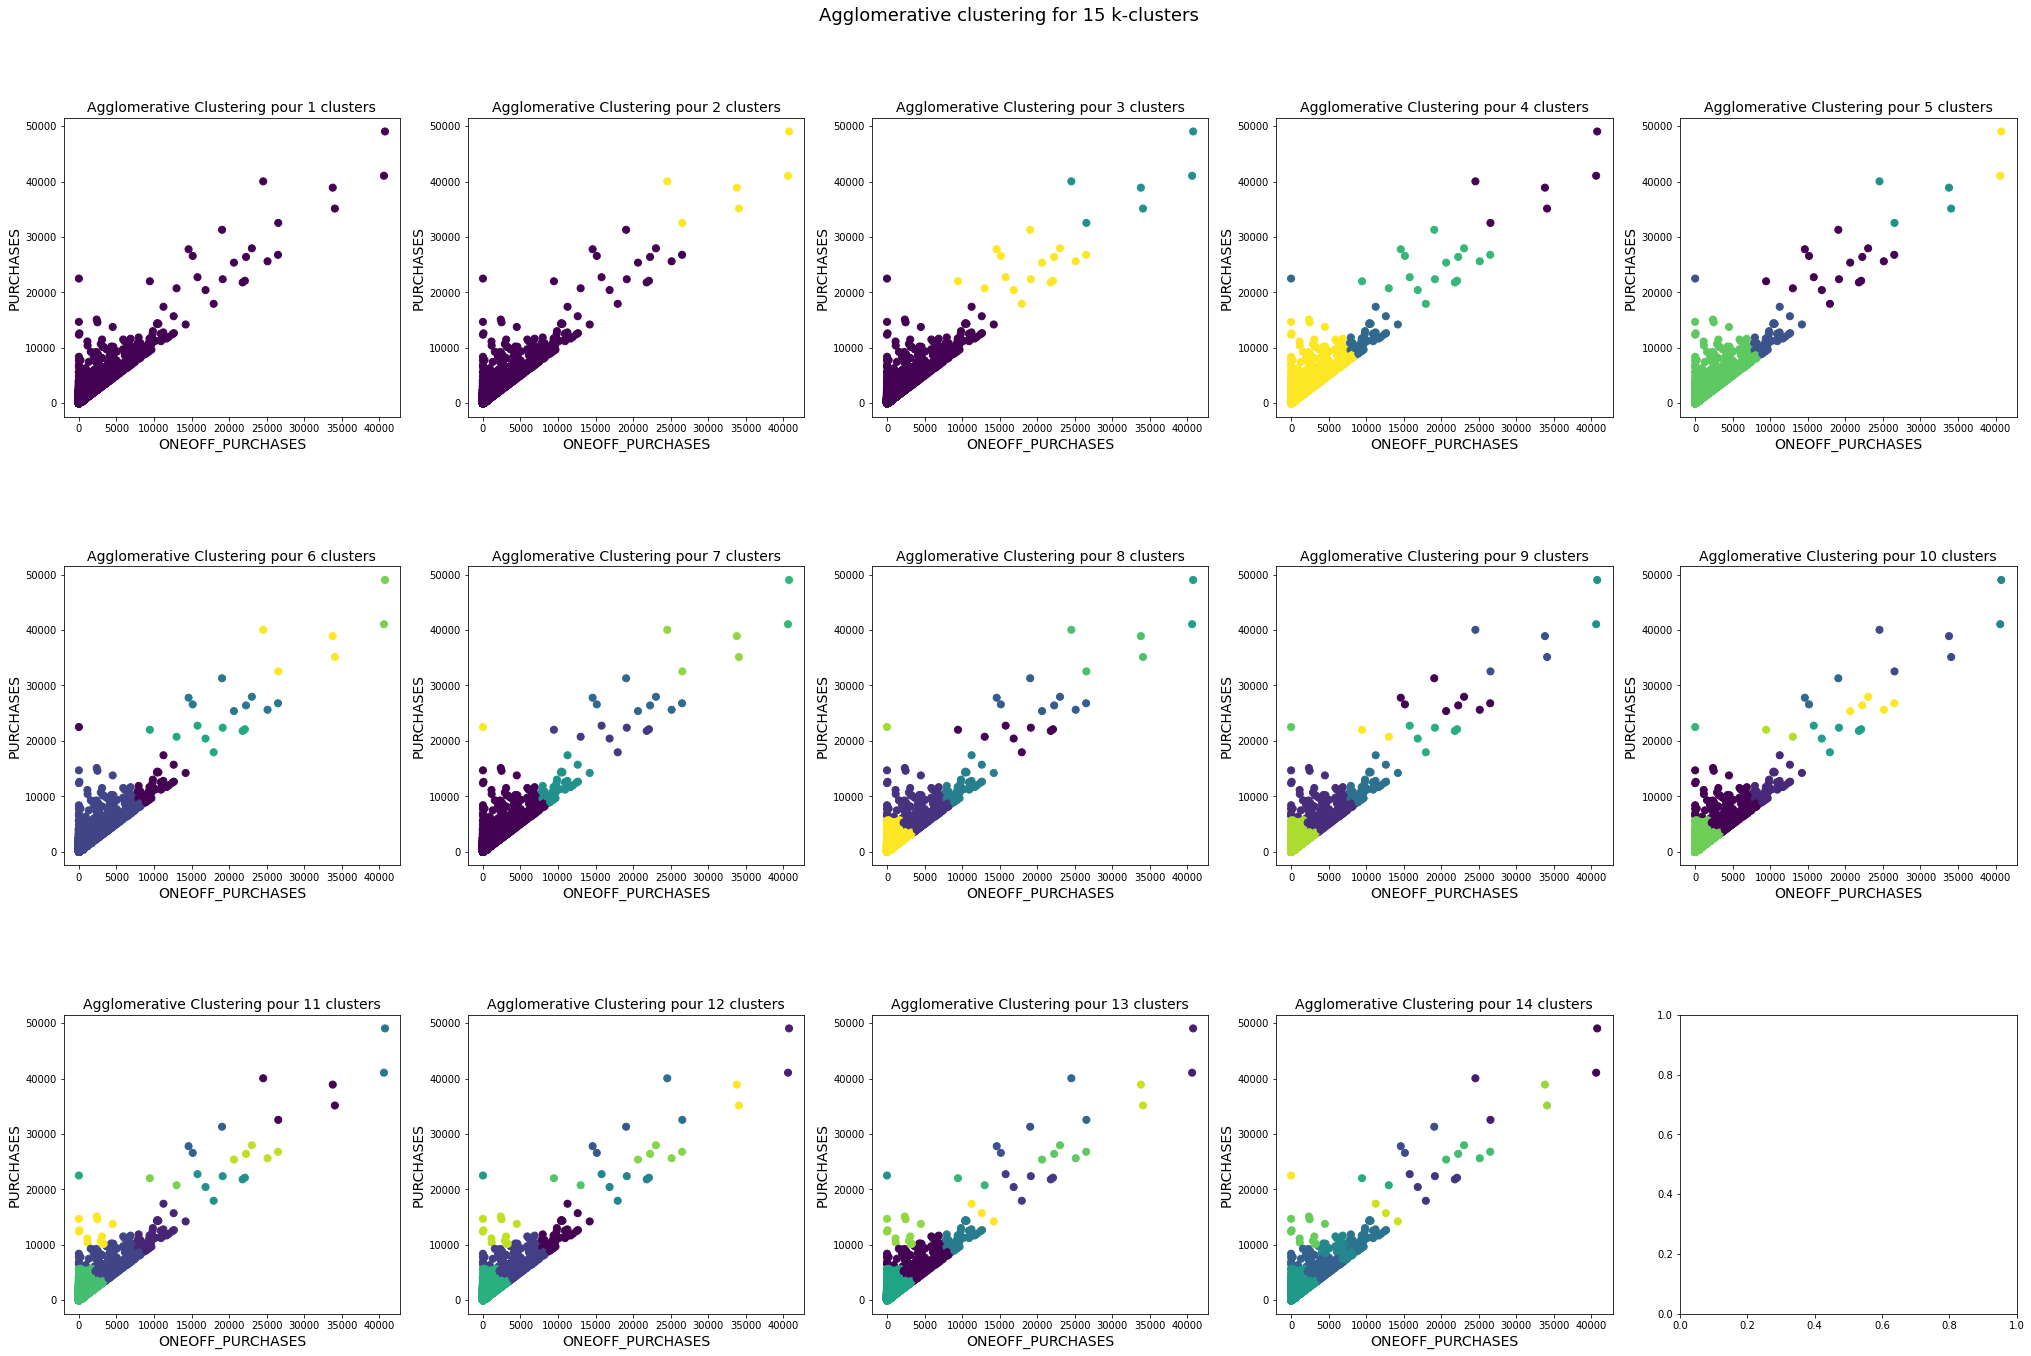

In [33]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(35, 22))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Agglomerative clustering for 15 k-clusters", fontsize=18, y=0.95)

# loop through tickers and axes
for k, ax in zip(agglomerative.columns, axs.ravel()):
  scatter = ax.scatter (data ['ONEOFF_PURCHASES'] , data ["PURCHASES"] , c= agglomerative[k], s=50)
  ax.set_title(f"Agglomerative Clustering pour {k} clusters", fontsize = 14)
  ax.set_xlabel("ONEOFF_PURCHASES", fontsize = 14)
  ax.set_ylabel("PURCHASES", fontsize = 14)

plt.show()

Visuellement à partir de 7 clusteurs on arrive pas vraiment à séparer les groupes dans le graph pour ce algorithme on va choisir **k=6 **comme le max nombre de cluster 

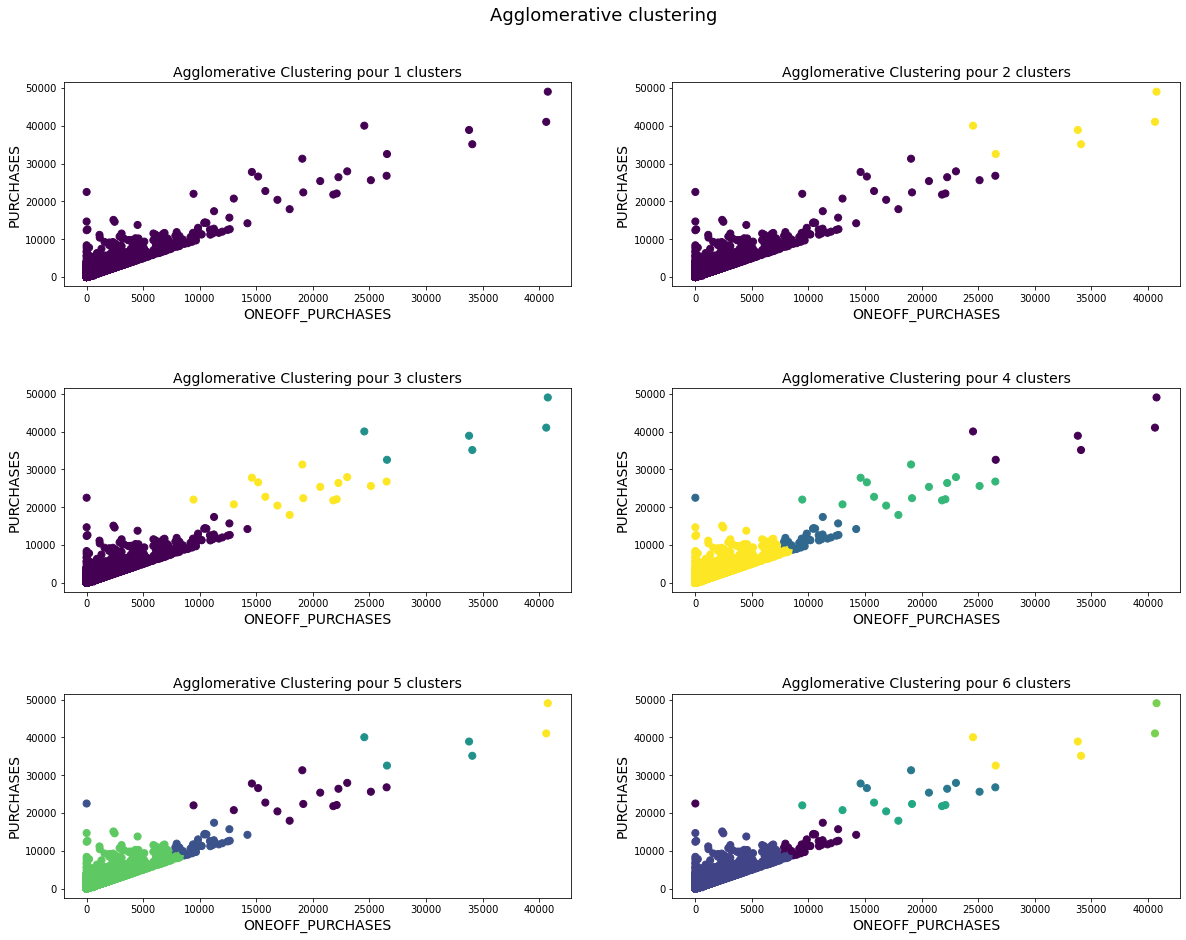

In [34]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Agglomerative clustering", fontsize=18, y=0.95)

# loop through tickers and axes
for k, ax in zip(agglomerative.columns, axs.ravel()):
  scatter = ax.scatter (data ['ONEOFF_PURCHASES'] , data ["PURCHASES"] , c= agglomerative[k], s=50)
  ax.set_title(f"Agglomerative Clustering pour {k} clusters", fontsize = 14)
  ax.set_xlabel("ONEOFF_PURCHASES", fontsize = 14)
  ax.set_ylabel("PURCHASES", fontsize = 14)

plt.show()

Pour K = 5, visualisons l'ensemble des features selectionnées 

In [35]:
hierarchical_clustering=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
cluster_labels=hierarchical_clustering.fit_predict(data)
agglomerative[0]=cluster_labels

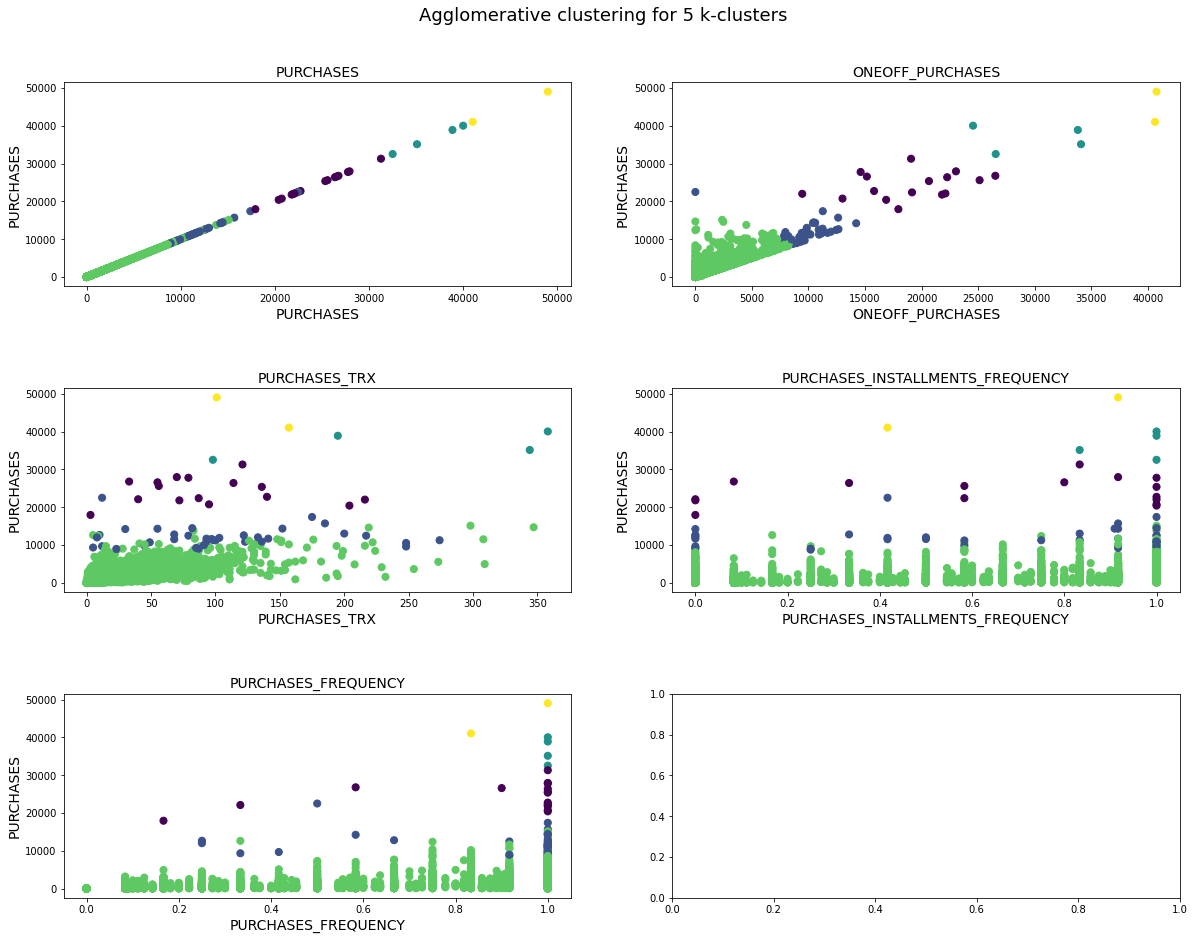

In [36]:
  fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
  plt.subplots_adjust(hspace=0.5)
  fig.suptitle("Agglomerative clustering for 5 k-clusters", fontsize=18, y=0.95)
  for k, ax in zip(list(data.columns), axs.ravel()):
    scatter = ax.scatter (data [k] , data ["PURCHASES"] , c= agglomerative[0], s=50)
    ax.set_title(f"{k}", fontsize = 14)
    ax.set_xlabel(f"{k}", fontsize = 14)
    ax.set_ylabel("PURCHASES", fontsize = 14)

### Interpretation

On a du mal à visualiser les clusters avec l'algorithme de **Agglomerative clustering** e utilisant des plot ordinaire : il nous faut donc une autre methode une **arborésceence**

# Plot the dendrogram. Use K-means clustering.

Comme arborésence on peut utilisé le **dendrogram**

In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
def plot_dendrogram(data, methode):
  Z = linkage(data,  method=methode)

  fig, ax = plt.subplots(1, 1, figsize=(12, 8))

  _ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)

  plt.title(f"Hierarchical Clustering Dendrogram  avec methode {methode}", fontsize=14)
  plt.xlabel("Nombre de points dans le noeud (ou index du point si pas de parenthèse).", fontsize=14)
  plt.ylabel("Distance.", fontsize=14)
  plt.show()


avec linkage qui utilise la metthode complete

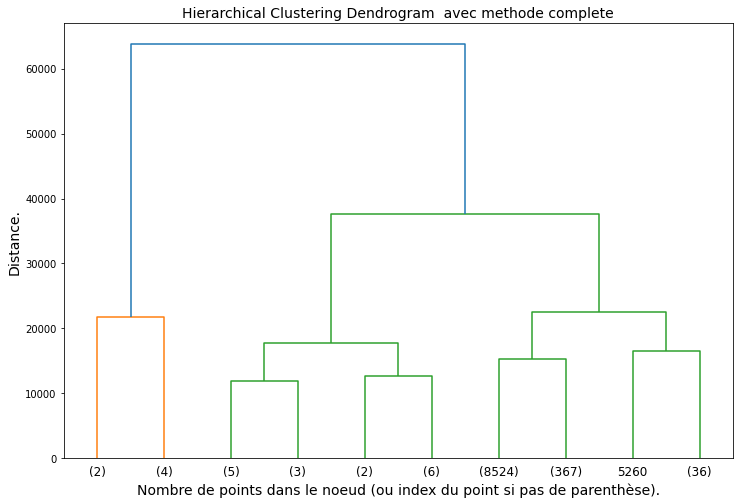

In [39]:
plot_dendrogram(data,  "complete")

avec linkage qui utilise la metthode ward

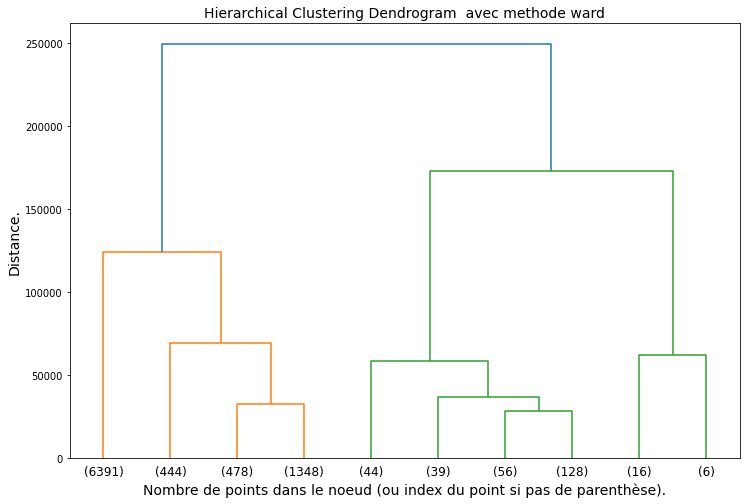

In [40]:
plot_dendrogram(data,  "ward")

# Partitional Clustering : **K-means**

In [41]:
from sklearn.cluster import KMeans 
kmeans=KMeans(n_clusters=5, random_state=0) 
kmeans.fit(data)

KMeans(n_clusters=5, random_state=0)

## K-means Labels


In [42]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,1
1,1
2,1
3,0
4,1
...,...
8945,1
8946,1
8947,1
8948,1


** K-means Centroids**

In [43]:
kmeans.predict(data)
print(kmeans.cluster_centers_) 

[[1.92500844e+03 1.10548139e+03 2.84512268e+01 5.48902855e-01
  7.77600539e-01]
 [2.89510380e+02 1.09861491e+02 6.75995229e+00 2.92693369e-01
  3.83943019e-01]
 [1.04267686e+04 7.34190472e+03 1.01292453e+02 6.79388236e-01
  9.17309906e-01]
 [2.90957155e+04 2.40214960e+04 1.23150000e+02 6.64999950e-01
  8.90833300e-01]
 [4.78272702e+03 3.27251621e+03 5.73363229e+01 6.63874348e-01
  8.94864496e-01]]


In [ ]:
['PURCHASES', 'ONEOFF_PURCHASES', 'PURCHASES_TRX','PURCHASES_INSTALLMENTS_FREQUENCY', "PURCHASES_FREQUENCY"]

 Try different K values and select the best one.

**K-best Value** 

k : 2 jusqu'à racine(nombre de point de données étudiés divisé par 2)

In [44]:
import math
k_max =  round(math.sqrt(data.shape[0]/2))
sum_of_squared_distances = []
k_values = range(2,k_max)

In [45]:
for k in k_values:
  k__mean = KMeans(n_clusters=k)
  k__mean = k__mean.fit(data)
  sum_of_squared_distances.append(round(k__mean.inertia_,2))
sum_of_squared_distances

[34128627146.41,
 16896883618.7,
 10764955838.75,
 8093621706.0,
 6289181312.14,
 5231007891.17,
 4487932545.34,
 3955723746.38,
 3560736576.91,
 3232765609.64,
 2927593443.74,
 2697214357.83,
 2487983271.49,
 2286910420.2,
 2086702566.08,
 1973288619.91,
 1776593774.94,
 1710256038.23,
 1591436511.84,
 1549074537.36,
 1450645656.45,
 1385707041.82,
 1293988579.4,
 1236709605.1,
 1184460452.32,
 1134070236.84,
 1077432737.47,
 1041070546.56,
 1000624730.36,
 951248565.19,
 937503388.92,
 889855619.1,
 842283069.33,
 813024851.56,
 781893829.94,
 750342481.58,
 720075065.11,
 702707775.84,
 667683102.08,
 647773410.72,
 631957240.8,
 607707364.9,
 577558926.79,
 564213261.55,
 554851279.6,
 536581660.65,
 511019008.65,
 494449674.59,
 485481087.38,
 469018131.01,
 454809456.18,
 443610939.25,
 434636751.34,
 420928810.24,
 412270178.75,
 397907828.5,
 391850331.43,
 383323639.07,
 364082016.28,
 364613263.78,
 357737803.02,
 345478008.91,
 341614032.04,
 334991767.08,
 324103717.34]

# Plot the clusters.

**Elbow Method**

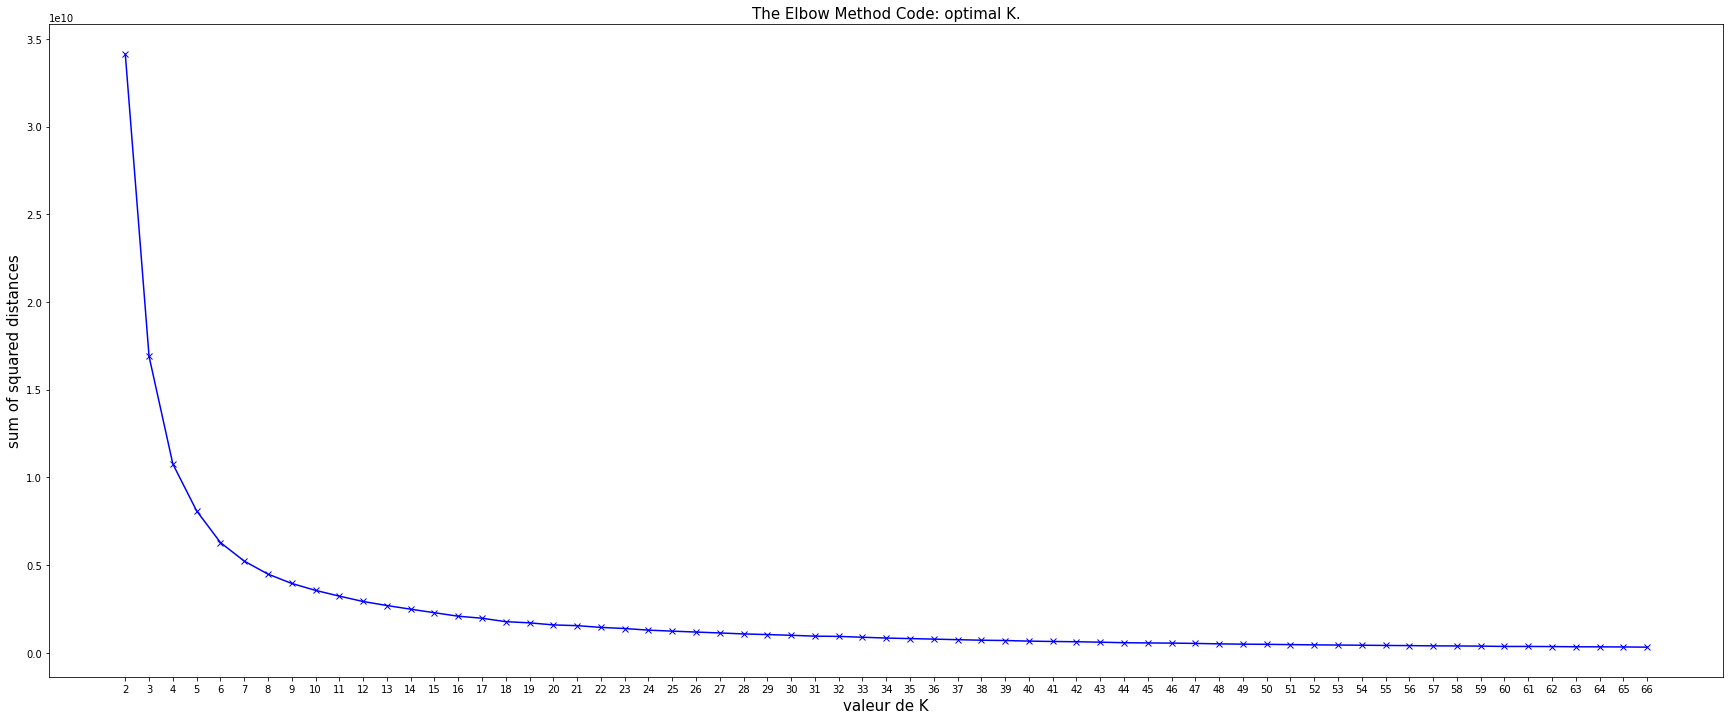

In [52]:
plt.figure(figsize=(30,12))
plt.plot(k_values, sum_of_squared_distances, 'bx-')
plt.xlabel('valeur de K', fontsize=15)
plt.xticks(k_values)
plt.ylabel('sum of squared distances', fontsize=15)
plt.title('The Elbow Method Code: optimal K.', fontsize=15)
plt.show()

## Interprétation

la meilleur valeur de K est **66** car elle se rapproche de plus en plus de zero 

# Compare the two results.

#### **Conclusion** :

L'algorithm agglomerative on avait trouvé une valeur de k idéale égale à k = 5 clusters et pour k-mean k = 66. ceci signifie qu'avec k-means on peut obtenir plus de classification alors que avec agglomerative on avait des valeurs qui nous mettait en overfiting lorsqu'on augmente le nombre de clusters: Ainsi l'algorithme de **K-means** est meilleur algorithme pour faire du clustering 